In [57]:
import numpy as np
import librosa
from scipy.signal import medfilt
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
from sklearn import preprocessing

In [58]:
bass_signal, sr = librosa.load("full_dataset_wav/train/bass/Actions - South Of The Water.stem.wav")
drums_signal, _ = librosa.load("full_dataset_wav/train/drums/Actions - South Of The Water.stem.wav")
rest_signal, _ = librosa.load("full_dataset_wav/train/rest/Actions - South Of The Water.stem.wav")
vocals_signal, _ = librosa.load("full_dataset_wav/train/vocals/Actions - South Of The Water.stem.wav")

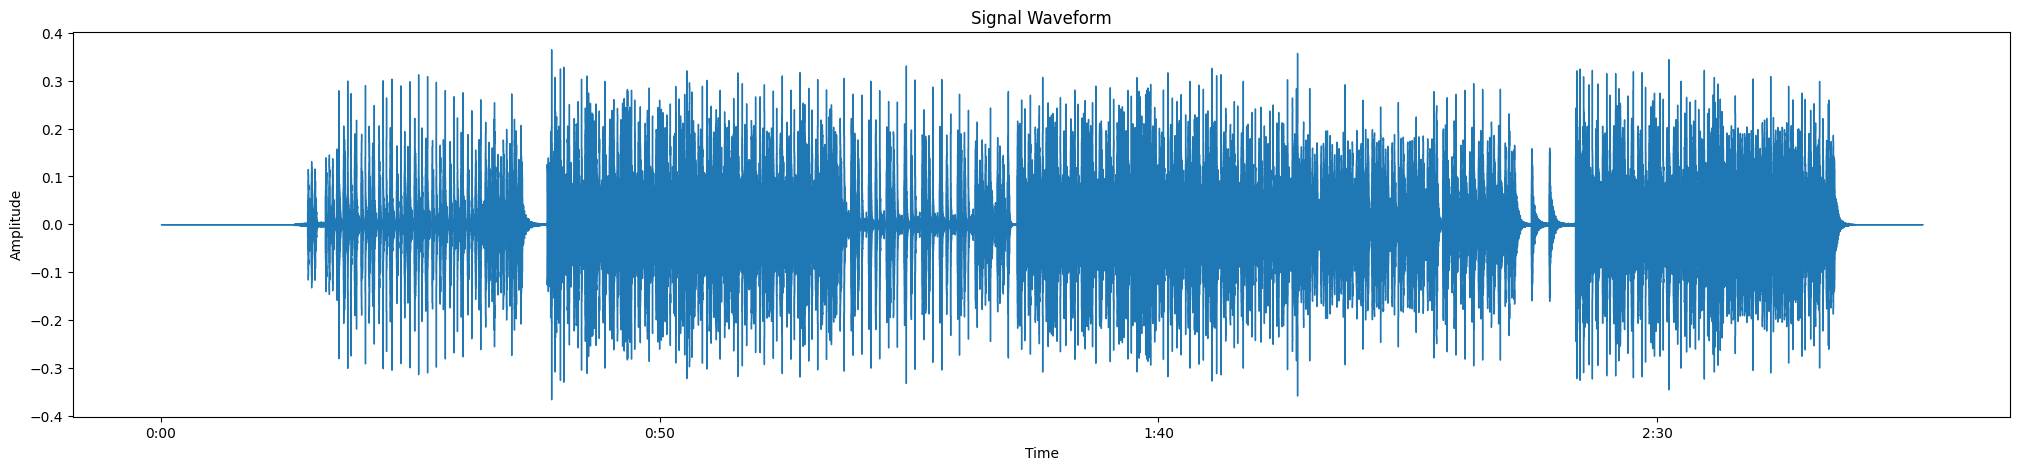

In [59]:
#plot signal waveform
plt.figure(figsize=(25, 5))
librosa.display.waveshow(drums_signal, sr=sr)
plt.title("Signal Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [60]:
def amplitude_envelope(signal, frame_size= 1024, hop_length = 512):
    amplitude_envelope = []

    #calculate AE for each frame
    for i in range(0, len(signal), hop_length):
        current_frame_amplitude_envelope = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_envelope)

    return np.array(amplitude_envelope)

In [61]:
ae_bass = amplitude_envelope(bass_signal)
frames = range(0, len(ae_bass))

t = librosa.frames_to_time(frames, hop_length=512)

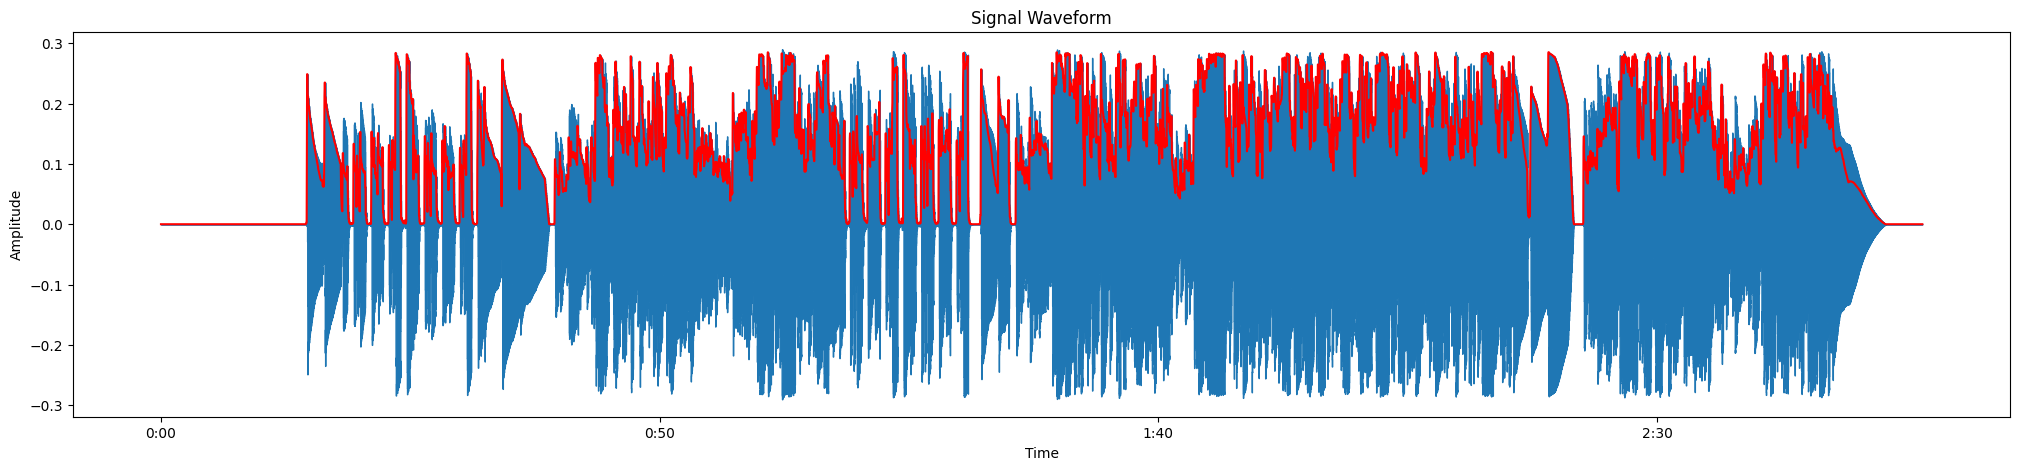

In [62]:
plt.figure(figsize=(25, 5))

plt.subplot(1,1,1)
librosa.display.waveshow(bass_signal, sr=sr)
plt.plot(t, ae_bass, color="r")
plt.title("Signal Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [63]:
def create_normalized_envelope(signals):
    bass_signal, drums_signal, rest_signal, vocals_signal = signals

    ae_bass = amplitude_envelope(bass_signal)
    ae_drums = amplitude_envelope(drums_signal)
    ae_rest = amplitude_envelope(rest_signal)
    ae_vocals = amplitude_envelope(vocals_signal)

    ae_bass = preprocessing.MinMaxScaler().fit_transform(np.array(ae_bass).reshape(-1,1)).reshape(1,-1)[0]
    ae_drums = preprocessing.MinMaxScaler().fit_transform(np.array(ae_drums).reshape(-1,1)).reshape(1,-1)[0]
    ae_rest = preprocessing.MinMaxScaler().fit_transform(np.array(ae_rest).reshape(-1,1)).reshape(1,-1)[0]
    ae_vocals = preprocessing.MinMaxScaler().fit_transform(np.array(ae_vocals).reshape(-1,1)).reshape(1,-1)[0]
    

    return ae_bass, ae_drums, ae_rest, ae_vocals

In [64]:
ae_normalized_bass, ae_normalized_drums, ae_normalized_rest, ae_normalized_vocals = create_normalized_envelope((bass_signal, drums_signal, rest_signal, vocals_signal))

In [65]:
max(ae_normalized_bass)

1.0

In [66]:
def stretch_sample(array, new_length):
    original_array = array
    old_indices = np.arange(len(original_array))
    new_indices = np.linspace(0, len(original_array) - 1, new_length)
    expanded_array = np.interp(new_indices, old_indices, original_array)
    return expanded_array

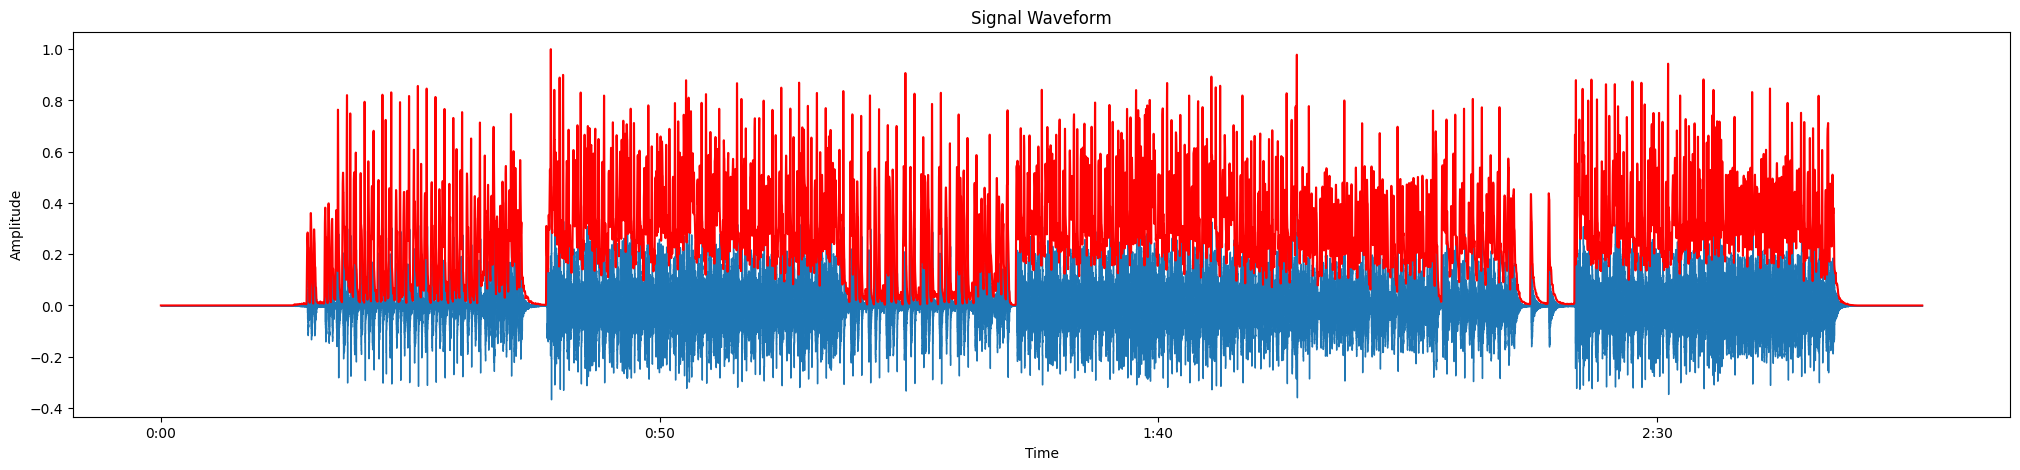

In [67]:
frames = range(0, len(ae_normalized_drums))
t = librosa.frames_to_time(frames, hop_length=512)
plt.figure(figsize=(25, 5))

ae_normalized_drums = stretch_sample(ae_normalized_drums, len(bass_signal))
t = stretch_sample(t, len(drums_signal))

plt.subplot(1,1,1)
librosa.display.waveshow(drums_signal, sr=sr)
plt.plot(t, ae_normalized_drums, color="r")
plt.title("Signal Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [73]:
def process_activations(amplitude_envelope, sr, time_window):
    activations = []
    #calculate AE for each frame
    for i in range(0, len(amplitude_envelope), int(sr * time_window)):
        activations.append(max(amplitude_envelope[i: int(i + sr * time_window)]))
    return activations


In [ ]:
process_activations(ae_normalized_drums, sr, 1)